#Столбцы таблицы:

CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly
%matplotlib inline
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

churn_data_zero = pd.read_csv('data/churn.csv')
churn_data = churn_data_zero.copy()
churn_data = churn_data.drop('RowNumber', axis=1)
#churn_data.describe()
#churn_data.info()

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

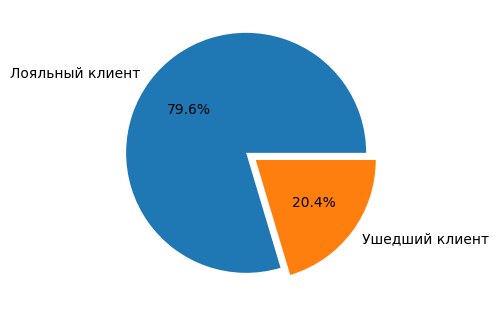

In [3]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
churn_data_active_member = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    churn_data_active_member,
    autopct='%.1f%%',
    labels= ['Лояльный клиент', 'Ушедший клиент'],
    explode = [0.1, 0]);
#print(churn_data_active_member)

Процент ушедших клиентов составляет 20.4%, это значит, что ушел каждый пятый клиент, это довольно серьезный уровень оттока. Рекомендуется определить состав аудитории, покинувшей банк (возраст, пол, местоположение, активность, платежеспособность и т.д.) и объем средств, ушедших вместе с клиентами, так как обычно стоимость приобретения новых клиентов в несколько раз выше стоимости обслуживания старых клиентов.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [10]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Гистограмма", "Box-plot"))
mask = churn_data['Balance'] > 2500

fig.add_trace(go.Histogram(x=churn_data[mask]['Balance']), 1, 1)

fig.add_trace(go.Box(x=churn_data[mask]['Balance'], name = ' '),  2, 1)


fig.update_layout(width = 800, height  = 600)

fig.update_layout(title="Распределение баланса пользователей, у которых на счету больше 2 500 долларов")
fig.update_xaxes(title='Баланс', col=1, row=1)
fig.update_xaxes(title='Баланс', col=1, row=2)
fig.update_yaxes(title='Количество', col=1, row=1)
#fig.update_yaxes(title='Количество', col=1, row=2)
fig.update_layout(legend=None, showlegend=False,)

fig.show()

churn_data[mask]['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

Полученный график распределения показателя баланса имеет вид нормального  распределение со следующими характеристиками
медиана 119839.69, среднее 119827.49, квантиль 0.75 -  139512.29, квантиль 0.25 -  100181.975, среднеквадратичное отклонение -  30095.06, IQR = 139512.29-100181.975= 39330.315
Нормальное распределение подчиняется правилу двух и трех сигм, то есть 68% пользователей, у которых на счету больше 2 500 долларов, имеют баланс в диапазоне от 89 до 149 тысяч, 95% пользователей имеют баланс в диапазоне от 59 до 179 тысяч, 99%  - в диапазоне от 29 до 209 тысяч.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [11]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
fig = make_subplots(rows=2, cols=2)
mask1 = churn_data['Exited']==1
mask0 = churn_data['Exited']==0

fig.add_trace(go.Histogram(x=churn_data[mask1]['Balance'], opacity=0.75, name='Ушедшие клиенты'), 1, 1)
fig.add_trace(go.Histogram(x=churn_data[mask0]['Balance'], opacity=0.45, name='Лояльные клиенты'), 1, 1)
fig.update_layout(barmode='overlay',)


fig.add_trace(go.Box(x=churn_data[mask1]['Balance'], name='Ушедшие клиенты'), 2, 1)
fig.add_trace(go.Box(x=churn_data[mask0]['Balance'], name='Лояльные клиенты'), 2, 1)
#fig.update_layout(width = 800, height  = 900)

mask1_1 = (churn_data['Exited']==1) & (churn_data['Balance']>0) #ушедшие клиенты с ненулевым балансом
mask0_1 = (churn_data['Exited']==0) & (churn_data['Balance']>0) #лояльные клиенты с ненулевым балансом

fig.add_trace(go.Histogram(x=churn_data[mask1_1]['Balance'], opacity=0.75, name='Ушедшие клиенты'), 1, 2)
fig.add_trace(go.Histogram(x=churn_data[mask0_1]['Balance'], opacity=0.45, name='Лояльные клиенты'), 1, 2)
fig.update_layout(barmode='overlay',)


fig.add_trace(go.Box(x=churn_data[mask1_1]['Balance'], name='Ушедшие клиенты'), 2, 2)
fig.add_trace(go.Box(x=churn_data[mask0_1]['Balance'], name='Лояльные клиенты'), 2, 2)



fig.update_layout(title="Распределение баланса клиента в разрезе признака оттока")
fig.update_xaxes(title='Баланс', col=1, row=1)
fig.update_xaxes(title='Баланс', col=2, row=1)
fig.update_yaxes(title='Количество', col=1, row=1)
fig.update_layout(legend_orientation="h", legend=dict(x=.5, xanchor="center"), hovermode="x", margin=dict(l=0, r=0, t=40, b=0))
#fig.update_yaxes(title='Количество', col=1, row=2)
#fig.update_layout(legend=1)
fig.show()

print("Статистика по ушедшим клиентам с ненулевым балансом")
print(churn_data[mask1_1]['Balance'].describe())

print("Статистика по лояльным клиентам с ненулевым балансом")
print(churn_data[mask0_1]['Balance'].describe())

Статистика по ушедшим клиентам с ненулевым балансом
count      1537.000000
mean     120746.971132
std       30555.192802
min        3768.690000
25%      103700.690000
50%      119948.090000
75%      137986.580000
max      250898.090000
Name: Balance, dtype: float64
Статистика по лояльным клиентам с ненулевым балансом
count      4846.000000
mean     119535.864270
std       29944.927372
min       14262.800000
25%       99118.230000
50%      119791.215000
75%      139747.397500
max      221532.800000
Name: Balance, dtype: float64


При просмотре распределения баланса клиентов на выборке в целом в разрезе признака оттока, видно, что у ушедших клиентов выше медианное значение, и распределение положительно ассиметрично, что означает, что среди ушедших больше клиентов с большой суммой на балансе, среднее больше моды и медианы.
Если исключить из выборки клиентов с нулевым балансом, то есть рассмотреть клиентов с деньгами в разрезе признака оттока, то увидим, что медианные значения в этом случае практически одинаковы, но ассиметричность распределения баланса для ушедших клиентов по прежнему присутствует. Влиять на решение клиентов уйти может множество факторов, таких как количество и тип продуктов, которыми владеют клиенты, возраст и пол клиентов, влияние географических регионов, влияние категорий продуктов, качество и цена обслуживания и т.д. необходим дальнейший анализ для изучения связей между различными переменными

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [12]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
mask1 = churn_data['Exited']==1
mask0 = churn_data['Exited']==0

fig = make_subplots(rows=2, cols=1)
mask1 = churn_data['Exited']==1
mask0 = churn_data['Exited']==0

fig.add_trace(go.Histogram(x=churn_data[mask1]['Age'], opacity=0.75, name='Ушедшие клиенты'), 1, 1)
fig.add_trace(go.Histogram(x=churn_data[mask0]['Age'], opacity=0.45, name='Лояльные клиенты'), 1, 1)
fig.update_layout(barmode='overlay',)


fig.add_trace(go.Box(x=churn_data[mask1]['Age'], name='Ушедшие клиенты'), 2, 1)
fig.add_trace(go.Box(x=churn_data[mask0]['Age'], name='Лояльные клиенты'), 2, 1)
fig.update_layout(width = 1000, height  = 500)
fig.update_layout(legend_orientation="h", legend=dict(x=.5, xanchor="center"), hovermode="x", margin=dict(l=0, r=0, t=40, b=0))

fig.show()

print("Статистика по возрасту по ушедшим клиентам")
print(churn_data[mask1]['Age'].describe())

print("Статистика по возрасту по лояльным клиентам")
print(churn_data[mask0]['Age'].describe())

Статистика по возрасту по ушедшим клиентам
count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64
Статистика по возрасту по лояльным клиентам
count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64


Оба распределения имеют вид нормальных. по их графикам видно, что несмотря на то, что выбросов в правой части графика больше, чем в группе лояльных клиентов, их средний возраст меньше, чем у ушедших клиентов. Основная часть клиентов в группе ушедших находится в диапазоне возраста  35-53 год, есть смысл обратить внимание на эту подгруппу, которая как правило уже имеет устоявшуюся карьеру, стабильную зарплату, склонность к стабильности и более высокие требования к качеству и отдаче продуктов

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

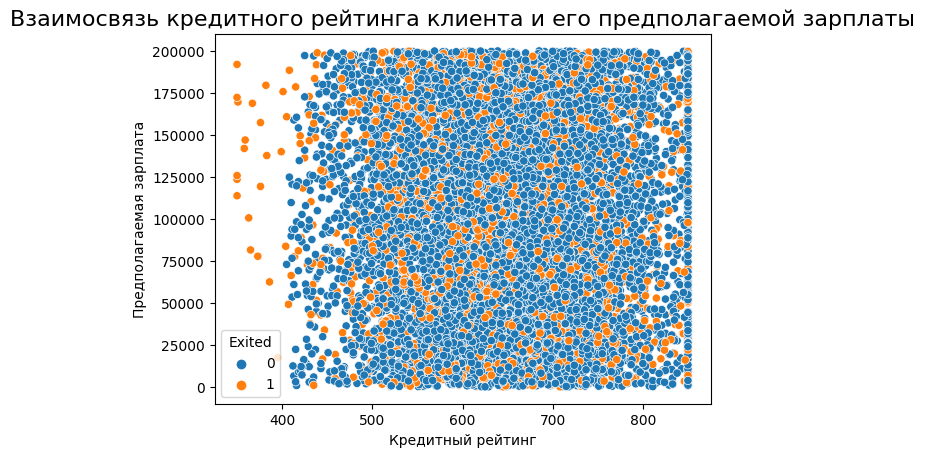

In [13]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент
mask = churn_data['Exited']  == 1
#fig = plt.figure(figsize=(10, 6))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    #s=100,
    #size='CreditScore',
    #sizes=(5, 500)

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая зарплата');


churn_data['CreditScore'].describe()



не прослеживается явной взаимосвязи между признаками Кредитный рейтинга и предполагаемой зарплаты, можно только утверждать, что большинство клиентов имеет кредитный рейтинг между 550  и 650 независимо от размера предполагаемой зарплаты. есть вопрос, на основе каких сведений и алгоритмов у клиента формировалось значение признака "предполагаемая заработная плата клиента" и какова их достоверность и приемлемость

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

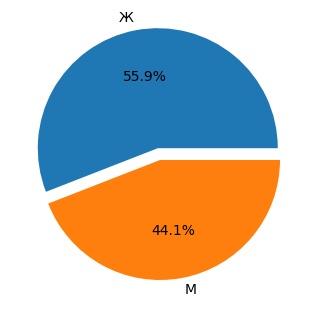

In [14]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент
mask = churn_data['Exited']  == 1
churn_data_gender = churn_data[mask]['Gender'].value_counts()
#print(churn_data_gender)

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    churn_data[mask]['Gender'].value_counts(),
    autopct='%.1f%%',
    labels= ['Ж', 'М'],
    explode = [0.1, 0]);
#churn_data_gender

#print(churn_data_active_member)


из графика видно, что женщины уходят чаще, чем мужчины

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [15]:
s1 = churn_data.groupby(by='NumOfProducts')['Exited'].agg(['count', 'sum', 'mean'])

s1['NumOfProducts'] = s1.index
s1['rest'] = s1['count'] - s1['sum']
values = s1['sum']
values2 = s1['rest']
##labels = tuple(range(1,5))
labels = s1['NumOfProducts']

fig = go.Figure()
fig.add_trace(go.Bar(x = labels, y = values, name = 'Ушедшие клиенты'))
fig.add_trace(go.Bar(x = labels, y = values2, name = 'Лояльные клиенты'))
fig.update_layout(barmode='stack')
fig.update_layout(width = 800, height  = 400)

fig.update_layout(title="Зависимость оттока от числа приобретенных услуг")
fig.update_xaxes(title='Число приобретенных услуг')
fig.update_yaxes(title='Количество')
fig.show()
#s1

из графика видно, что большинство клиентов предпочитает иметь 1-2 услуги, причем оставшиеся клиенты имеют в основном 2. Клиенты, имевшие больше услуг, ушли

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [16]:
#IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
mask = churn_data['IsActiveMember']  == 1
#fig = plt.figure(figsize=(10, 6))
churn_data['activity'] = churn_data['IsActiveMember'].apply(lambda x: 'Активный' if x == 1 else 'Не активный')
mask1 = churn_data['IsActiveMember']  == 1
mask0 = churn_data['IsActiveMember']  == 0
fig = go.Figure()
fig.add_trace(go.Histogram(x=churn_data[mask1]['Exited'], opacity=0.75, name='Активные  клиенты'))
fig.add_trace(go.Histogram(x=churn_data[mask0]['Exited'], opacity=0.45, name='Неактивные клиенты'))
#fig.update_layout(barmode='overlay',)
fig.update_layout(width = 800, height  = 400)
fig.update_layout(title="Влияние статуса активного клиента на оттока клиентов")
fig.update_xaxes(title=' 0 -лояльный клиент                       1- ушедший клиент')
fig.update_yaxes(title='Количество') 
fig.show()

из диаграммы видно, что неактивные клиенты уходят чаще, чем активные. банку можно посоветовать искать методы повышения активности клиентов, наладить систему отслеживания эффективности продуктов, также предоставлять для разных групп клиентов различные методы обслуживания

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [18]:

churn_data.groupby('Geography').mean()
mask=churn_data['Exited']==1
churn_data_country = churn_data.groupby('Geography')['Exited'].agg(['count', 'sum', 'mean'])
churn_data_country['Geography'] = churn_data_country.index
churn_data_country
#строим график
fig = px.choropleth(
    data_frame=churn_data_country, #DataFrame
    locations="Geography", #столбец со странами
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="mean", #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    range_color=[0.1, 0.35], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds', #палитра цветов
    scope = 'europe'
)
#отображаем график
fig.show()



C:\Users\Людмила\AppData\Local\Temp\ipykernel_16964\1651189370.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Доля ушедших клиентов во Франции и Испании практически одинакова, доля ушедших клиентов в Германии почти в 2 раза больше, чем во Франции или Испании. Причины могут быть различны: потеря цены, потеря продукта, потеря обслуживания, потеря рынка, потеря продвижения, потеря технологии и политическая потеря,  обычно несколько факторов работают вместе, чтобы вызвать отток клиентов. Причины необходимо устанавливать и искать взаимосвязи между различными факторами.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

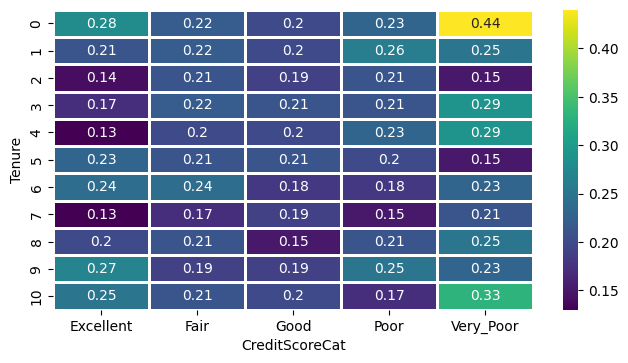

In [19]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

d = churn_data.pivot_table(
    values='Exited',
    index='Tenure',
    columns='CreditScoreCat',
    fill_value=0
).round(2);

fig = plt.figure(figsize=(6, 3))
axes = fig.add_axes([0, 0, 1, 1])
dt_heatmap = sns.heatmap(
    d, annot=True,
    linewidth=2,
    linecolor='w',
    cmap='viridis',
    ax = axes
)



из графика видно, что чаще всего уходят новые клиенты из категории Very_Poor, с наименьшим кредитным рейтингом